# Formalized Problem
    1. Given a gene matrix, correct for gene expression drop out

# Create Data for PCA

In [259]:
import numpy as np
import math
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA as sklearnPCA

#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Create Cell Data

In [2]:
np.random.seed(4294967295) # random seed for consistency

# Cell 1 Data

In [253]:
#Set parameters
mean_cell1 = [8,8,8,8,7,7,9,7,8,8]
cov = np.identity(10) 
cell1 = np.random.multivariate_normal(mean_cell1, cov, 30)
shape(cell1)

(30, 10)

# Cell 2 Data

In [107]:
mean_cell2 = [4,4,2,3,4,3,4,5,4,4]
cov = np.identity(10) 
cell2 = np.random.multivariate_normal(mean_cell2, cov, 30)
shape(cell2)


(30, 10)

# Cell 3 Data

In [108]:
mean_cell3 = [0,1,1,2,1,0,1,1,2,2]
cov = np.identity(10) 
cell3 = np.random.multivariate_normal(mean_cell3, cov, 30)
shape(cell3)

(30, 10)

# Dimension Viz + Plot without Drop Out 

In [119]:
#Cell PCA
#feature space/genes = 10, samples = 90
#each element is the level of expression (log read count) of the jth gene, ith sample

t = np.concatenate((cell1, cell2, cell3),)
print shape(t)
pca1 = sklearnPCA(n_components=5)
fitted1 = pca1.fit(t)
trans1 = pca1.transform(t)
shape(trans1)

(90, 10)


(90, 5)

In [110]:
# #Cell 2 PCA
# pca2 = sklearnPCA(n_components=10)
# fitted2 = pca2.fit(cell2)
# trans2 = pca2.transform(cell2) 

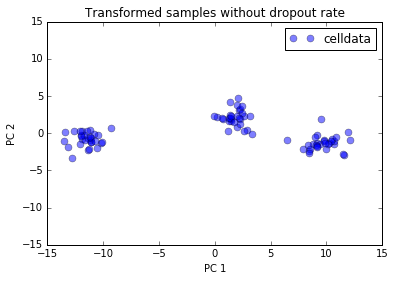

In [182]:
plt.plot(trans1[:,0], trans1[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='celldata')

#plt.plot(trans2[:,0], trans2[:,1], '^', markersize=7, color='red', alpha=0.5, label='cell2')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.legend()
plt.title('Transformed samples without dropout rate')

plt.show()

In [112]:
trans1[:,1]

array([-0.23316383, -0.30869411, -0.11665085,  0.69953386,  0.42248976,
       -0.96678886, -1.22469783, -0.77301821, -1.477204  , -1.06425889,
       -0.69659406, -0.61638165,  0.24439628, -1.1798189 , -2.30507036,
        0.24519629, -0.95701653, -0.46949311, -1.36761843, -1.83792262,
       -1.94359267, -1.03749372, -0.27709268, -0.31337866, -2.14540754,
       -3.3391291 ,  0.32023871,  0.28559193,  0.17694161, -1.21890807,
        3.18185469,  3.31570023,  2.20089583,  0.29155573,  1.89713408,
        1.95620799,  0.88013391,  2.33709128,  1.9655611 ,  4.7099501 ,
        2.26541764,  1.67374326,  1.24250756,  1.67780465,  2.26065963,
        0.41343231,  3.73829609,  2.69733939,  1.98876608,  2.43472412,
        4.2516874 ,  2.06360773,  2.07235404,  2.28904265, -0.10020287,
        1.99600032,  1.52254634,  0.29721636,  2.34944784,  3.59717233,
       -1.37953472, -1.44536952, -1.51365343, -0.25801362, -1.01000946,
       -1.50145515, -1.5962486 ,  0.14278429, -0.97345245, -2.13

# Drop out rate parameters

In [129]:
#mu is the mean vector aka centroid
def drop_out(exp):
    p = math.e**(-.1 * exp**2)
    return np.random.binomial(1, p, 1)[0]

In [130]:
noise_1 = .1 * np.random.randn(shape(t)[0], shape(t)[1]) 
# noise_2 = .1 * np.random.randn(shape(cell2)[0], shape(cell2)[1]) 

In [238]:
nsd1 = np.copy(t) + np.copy(noise_1)
#nsd2 = np.copy(cell2) + np.copy(noise_2)

In [239]:
count = 0
for (i,j), value in numpy.ndenumerate(nsd1):
    if (drop_out(value) == 1):
        count += 1
        nsd1[i,j] = 0
print count

349


In [240]:
shape(nsd1)

(90, 10)

In [241]:
nsd1

array([[  8.71756476,   7.41966421,   7.84841081,   8.06106977,
          8.09707229,   7.06698628,   9.25250314,   6.849659  ,
          7.82316931,   7.89703802],
       [  7.76947104,   6.39677202,   6.84111947,   7.79015147,
          7.20048624,   7.81003976,   9.08530092,   6.30589603,
          7.38320015,   7.86295603],
       [  7.05477619,   8.57923986,   7.19999229,   8.41160252,
          6.64268328,   5.79005019,   9.08864476,   7.93435268,
          8.07084993,   6.94865458],
       [  6.64345628,   7.50319829,   6.76425339,   6.46936686,
          7.18774503,   4.96181977,   9.54063412,   7.36948207,
          7.04497078,   7.34318929],
       [  9.03469186,   6.50311542,   7.9174532 ,   6.95550253,
          5.92613966,   6.54478648,   9.4118222 ,   7.81474099,
          8.33345176,   7.34150107],
       [  8.27518128,   8.24693373,   7.22783167,   8.0677407 ,
          7.08509357,   6.33958122,   8.17441388,   5.87957239,
          8.67303541,   8.22384527],
       [  

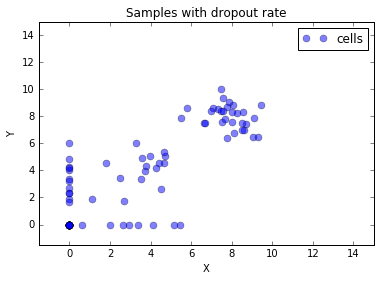

In [258]:
plt.plot(nsd1[:,0], nsd1[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='cells')

plt.xlabel("X")
plt.ylabel("Y")
plt.xlim([-1.5,15])
plt.ylim([-1.5,15])
plt.legend()
plt.title('Samples with dropout rate')

plt.show()

# With Dropout Visualization

In [242]:
#Cell PCA
#feature space = 90, samples = 10
pca2 = sklearnPCA(n_components=5)
fitted1 = pca2.fit(nsd1)
trans2 = pca1.transform(nsd1)
shape(trans2)

(90, 5)

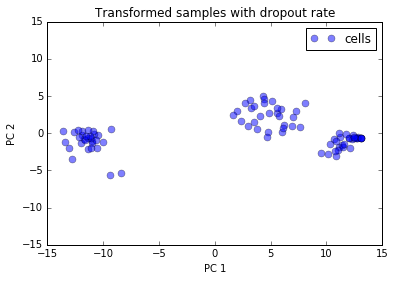

In [255]:
plt.plot(trans2[:,0], trans2[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='cells')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.legend()
plt.title('Transformed samples with dropout rate')

plt.show()

In [244]:
trans2[:,0]

array([-11.9184336 , -10.45808605, -10.77816766,  -9.2951556 ,
       -10.94269827, -10.98521858, -11.01733012, -11.68047651,
       -11.96299082, -13.38464874, -11.33326855, -11.12411986,
       -11.92616307,  -9.39492273, -11.33776632, -11.33616333,
       -11.65974655, -11.1931352 ,  -8.43395167, -13.08619767,
       -10.50950138, -10.66878871, -11.54305488, -12.15306662,
       -11.04837429, -12.79569146, -12.59467833, -12.26106838,
       -13.55500445, -10.03051963,   5.61205479,   5.9146472 ,
         3.29063509,   4.76182344,   4.6658258 ,   3.14315461,
         6.22668616,   7.66248838,   2.00760345,   4.3430564 ,
         4.0583566 ,   2.94803761,   5.79105299,   2.35802725,
         1.64228548,   7.04516259,   2.72506128,   5.11042988,
         5.57809376,   3.50590578,   4.38510608,   6.04266923,
         4.38932688,   7.26482613,   6.10381986,   3.55614287,
         3.80623831,   6.95191762,   4.82975586,   8.09006294,
        11.13997665,  12.08396042,  13.07182318,  12.28

# Methods

In [245]:
shape(nsd1)

(90, 10)

In [246]:
# centers = [[1, 1], [-1, -1], [1, -1]]
# X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
#                             random_state=0)

# X = StandardScaler().fit_transform(X)


In [247]:
# shape(X)

In [248]:
db = DBSCAN(eps=1.5, min_samples=3).fit(nsd1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print labels
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  0  0  0 -1  0  0 -1 -1 -1  0  0  1 -1
 -1 -1 -1 -1  0  0  1  0 -1 -1  0 -1 -1 -1 -1]
Estimated number of clusters: 2
Silhouette Coefficient: -0.158
